In [2]:
import gymnasium as gym
import environment
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [8]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=5, scale_actions = 0.4, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0], 
               cl_reward = True, cl_reset = 0.5, render_mode = "human")
model = PPO.load("15042024_ClTargetAuto_256_256", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=10)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [14]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

In [18]:
print(obs)
obs[0][-1] = 0.9
print(obs)

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.   0.5]]
[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.   0.9]]


Step: 0, Action: [[ 1.          1.          1.          1.          1.          1.
   0.47911707  1.          1.          1.          1.         -1.
   1.         -0.6101035   1.          0.89080876  1.          1.
  -1.         -0.91141903 -1.        ]], Reward: [136.34795], Done: [False], Info: [{'step': 1, 'efficiency': 136.06879018498842, 'cl': 1.2046185706248467, 'TimeLimit.truncated': False}]


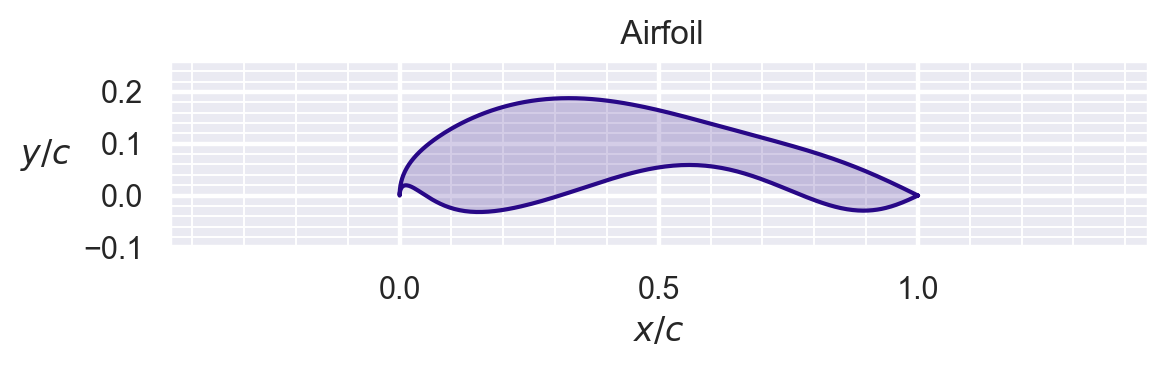

Step: 1, Action: [[ 1.          0.47984067 -0.3646148   0.48915148 -0.7030524  -0.21851158
  -0.20887333  0.29701295  0.9235705   0.75354147  1.         -0.9616729
   1.         -1.          0.691723   -1.         -0.34427184  0.00390782
  -1.          0.11590457 -1.        ]], Reward: [108.945915], Done: [False], Info: [{'step': 2, 'efficiency': 101.48454558872561, 'cl': 0.9097732166683534, 'TimeLimit.truncated': False}]


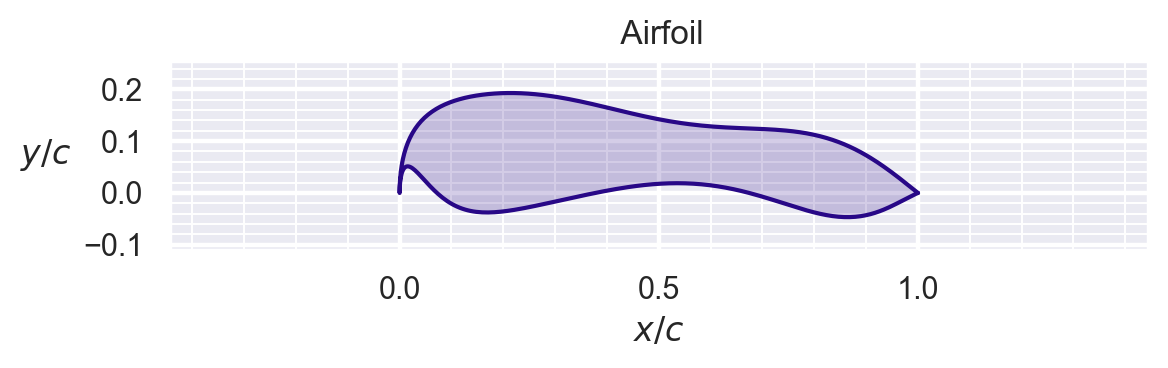

Step: 2, Action: [[ 0.6169841   0.4584393   0.13154745  0.1982895  -0.00689642  0.53928167
   0.33533052  0.32004055  0.32283404  1.          0.42119524  0.10320516
   0.2921417  -0.3043992   0.6611751  -1.          0.69592196  0.40188587
  -0.55314934 -0.31254464 -1.        ]], Reward: [104.38644], Done: [False], Info: [{'step': 3, 'efficiency': 102.67294525274092, 'cl': 1.061279480954597, 'TimeLimit.truncated': False}]


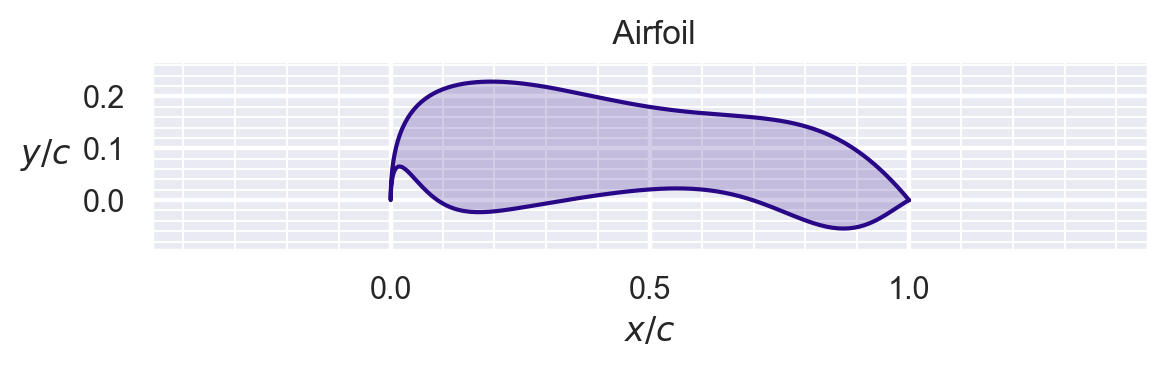

Step: 3, Action: [[-0.09649035 -0.05036939 -0.06480905 -0.06455921 -0.30863747  0.07679892
  -0.20347735 -0.24085075 -0.10029607  0.43816847 -0.12123031  0.51263934
  -0.4882211   0.25710398  0.05337001 -0.7397302   0.08083345  0.01744982
   0.02447672 -0.26084375 -0.39413184]], Reward: [106.09322], Done: [False], Info: [{'step': 4, 'efficiency': 100.53457623236082, 'cl': 0.9442437145717533, 'TimeLimit.truncated': False}]


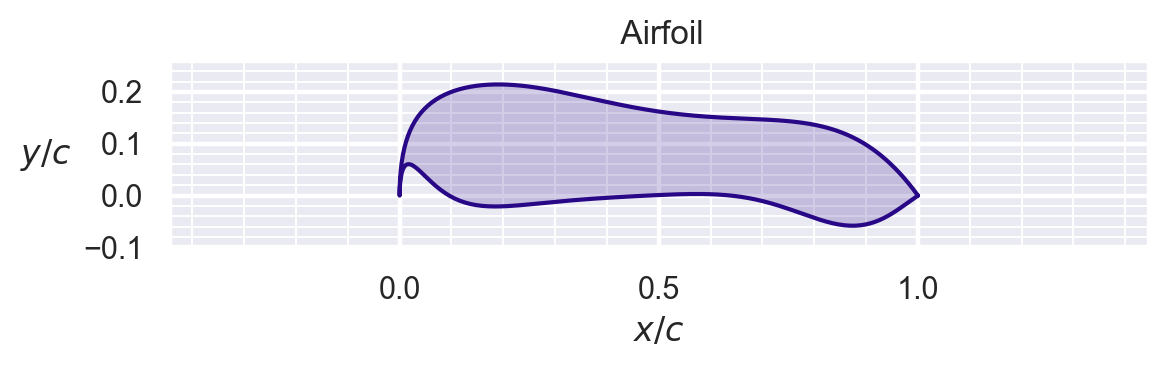

Step: 4, Action: [[-0.17049932 -0.0311064  -0.09588388  0.00904856 -0.08927998  0.22768131
  -0.26633424 -0.14620514 -0.17563275 -0.18769285 -0.19078156  0.44439614
  -0.43679863  0.55105966 -0.01754733 -0.10768918  0.15455185  0.15279551
   0.26112992 -0.2297253  -0.24244267]], Reward: [123.58684], Done: [ True], Info: [{'step': 5, 'efficiency': 121.17759481938421, 'cl': 1.030053525485811, 'episode': {'r': 579.360351, 'l': 5, 't': 149.078711}, 'TimeLimit.truncated': False, 'terminal_observation': array([ 1.0399978 ,  0.8427217 ,  0.3424959 ,  0.75277215,  0.05685348,
        0.75010014,  0.15430506,  0.59199905,  0.8881903 ,  1.3016069 ,
        0.7436734 , -0.4605729 ,  0.4468488 , -0.5425356 ,  0.8554883 ,
       -0.88264424,  0.5348142 ,  0.5304156 , -1.0070171 , -0.7394513 ,
       -1.4546298 ,  0.5       ], dtype=float32)}]


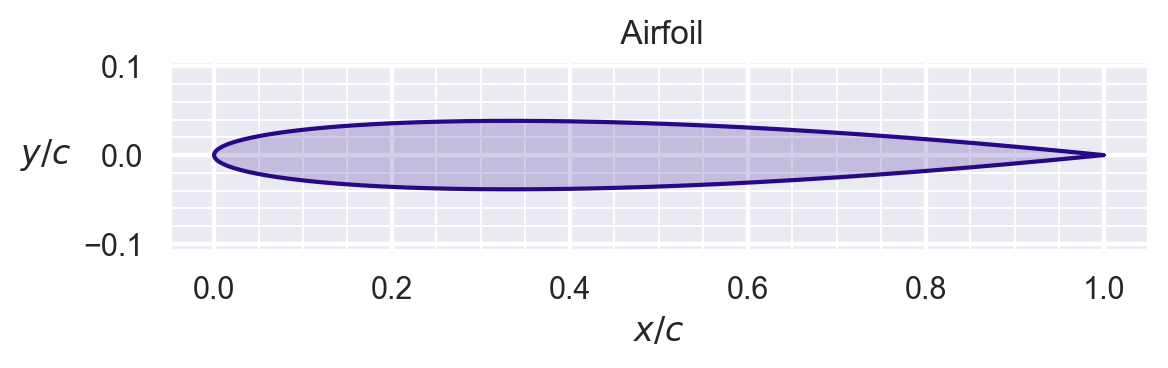

In [19]:

for i in range(5):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()